<a href="https://colab.research.google.com/github/suhanask/Assignments_ExcelR_Suhana/blob/main/Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

**Problem - Build a prediction model for Salary hike**

**EDA**

In [37]:
df = pd.read_csv('Salary_Data.csv')
df

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [39]:
df.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

In [40]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

**PLOTS**

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbf793a9e70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbf793aae60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbf793a8070>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbf793a9cf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbf793a96f0>],
 'means': []}

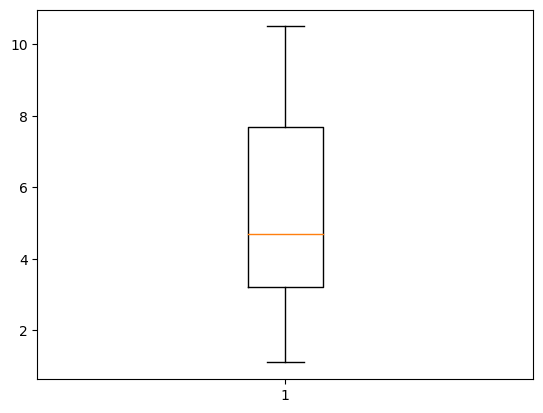

In [41]:
plt.boxplot(df['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbf7957f100>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbf7957e6b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbf7957ddb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbf7957f760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbf7957ed70>],
 'means': []}

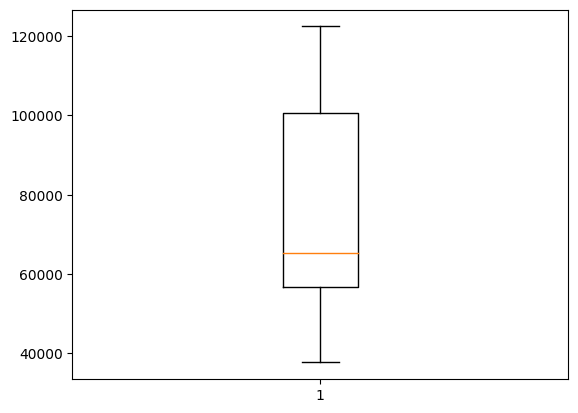

In [42]:
plt.boxplot(df['Salary'])

<ipython-input-43-4f34ded9cdf3>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


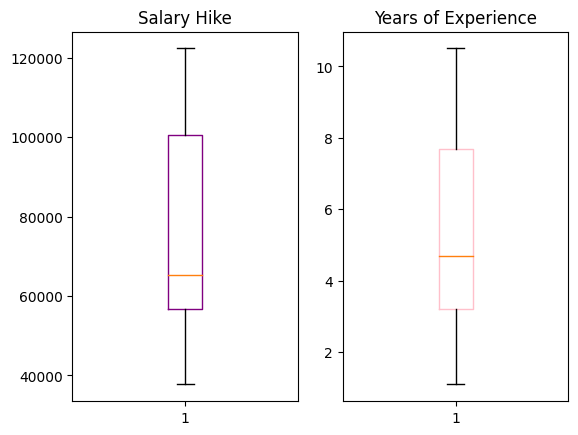

In [43]:
plt.subplots()
plt.subplot(121)
plt.boxplot(df['Salary'], boxprops=dict(color='purple'))
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'], boxprops=dict(color='pink'))
plt.title('Years of Experience')
plt.show()

Text(0.5, 1.0, 'Salary Hike')

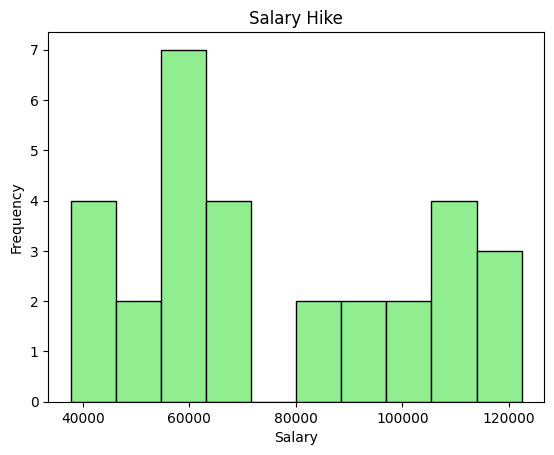

In [44]:
plt.hist(df['Salary'], color='lightgreen', edgecolor = 'black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Hike')

<ipython-input-45-c08d3305e394>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'], color='pink')


<Axes: xlabel='Salary', ylabel='Density'>

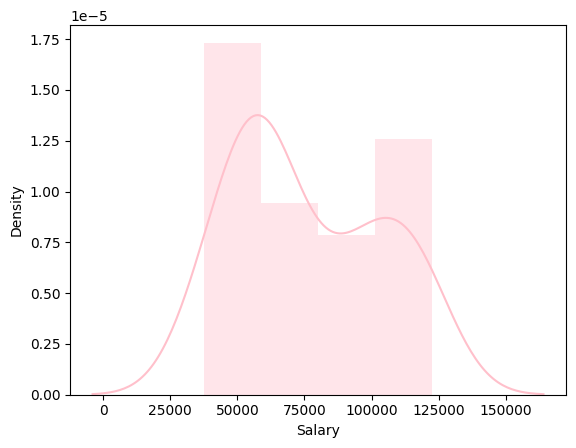

In [45]:
sns.distplot(df['Salary'], color='pink')

Text(0.5, 1.0, 'Years of Experience')

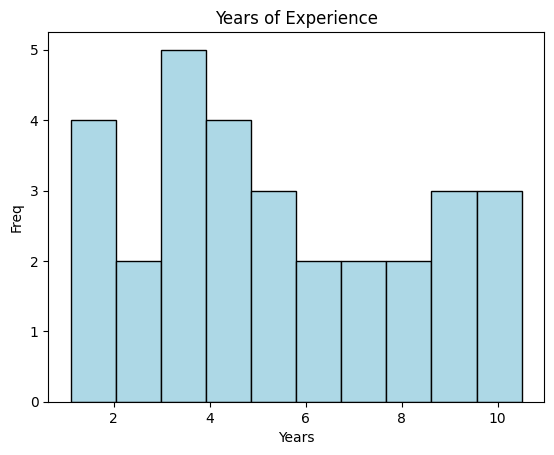

In [46]:
plt.hist(df['YearsExperience'], color='lightblue', edgecolor = 'black')
plt.xlabel('Years')
plt.ylabel('Freq')
plt.title('Years of Experience')

<ipython-input-47-6ca6ea62cb24>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YearsExperience'] , color='brown')


<Axes: xlabel='YearsExperience', ylabel='Density'>

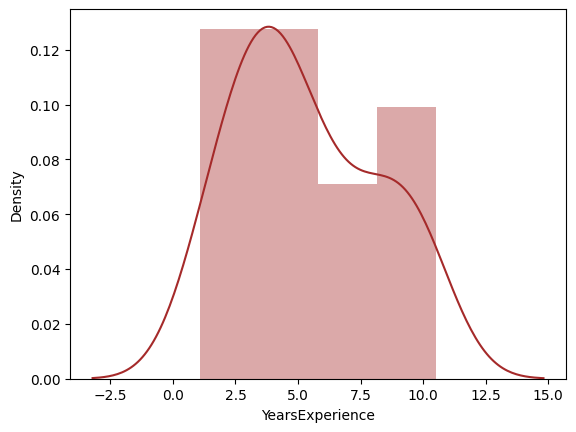

In [47]:
sns.distplot(df['YearsExperience'] , color='brown')


In [48]:
df.corr()

YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000

<Axes: xlabel='YearsExperience', ylabel='Salary'>

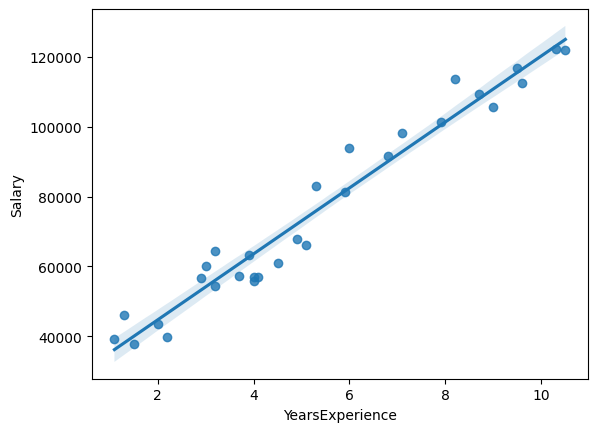

In [49]:
sns.regplot(x=df['YearsExperience'], y=df['Salary'])

**Regression Models**

***WITHOUT TRANSFORMATION***

In [50]:
model=smf.ols('Salary~YearsExperience', data=df).fit()

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           1.14e-20
Time:                        07:57:15   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
pred = model.predict(pd.DataFrame(df['YearsExperience']))
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [89]:
rmse = np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred))**2))
rmse

5592.043608760662

In [90]:
pred.corr(df['Salary'])

0.9782416184887601

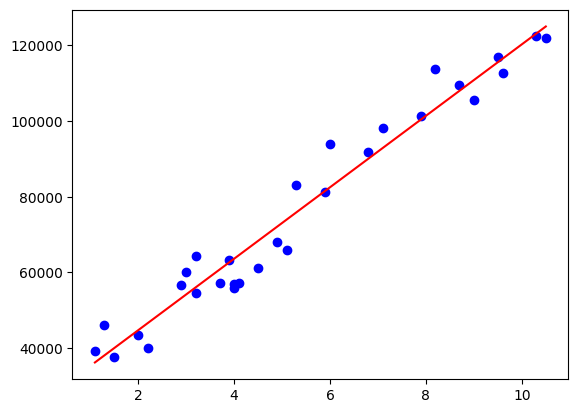

In [71]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'],color='blue')
plt.plot(df['YearsExperience'],pred, color='red')

Log Transformation

In [52]:
years_log = np.log(df['YearsExperience'])
years_log

0     0.095310
1     0.262364
2     0.405465
3     0.693147
4     0.788457
5     1.064711
6     1.098612
7     1.163151
8     1.163151
9     1.308333
10    1.360977
11    1.386294
12    1.386294
13    1.410987
14    1.504077
15    1.589235
16    1.629241
17    1.667707
18    1.774952
19    1.791759
20    1.916923
21    1.960095
22    2.066863
23    2.104134
24    2.163323
25    2.197225
26    2.251292
27    2.261763
28    2.332144
29    2.351375
Name: YearsExperience, dtype: float64

In [53]:
model1 = smf.ols('Salary~years_log',data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           3.25e-13
Time:                        07:57:15   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
years_log   4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
pred1 = model1.predict(pd.DataFrame(df['YearsExperience']))
pred1

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [56]:
rmse1 = np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred1))**2))
rmse1

10302.893706228306

In [59]:
pred1.corr(df['Salary'])

0.924061081788264

Text(0, 0.5, 'Salary')

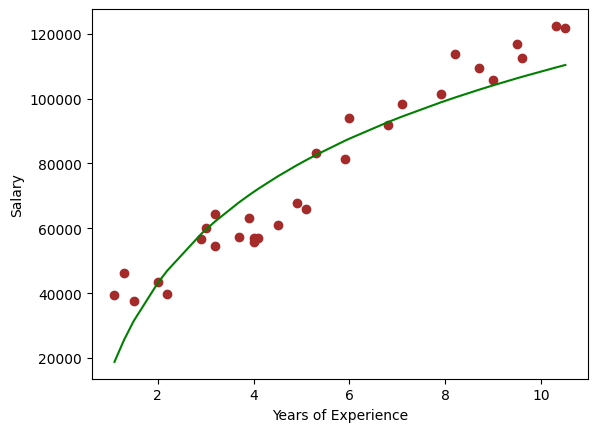

In [65]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'], color='brown')
plt.plot(df['YearsExperience'],pred1,color='green')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

***MODEL 2***

In [66]:
model2 = smf.ols('np.log(Salary)~YearsExperience', data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           7.03e-18
Time:                        09:03:23   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
pred2_log = model2.predict(pd.DataFrame(df['YearsExperience']))
pred2_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [73]:
pred2 = np.exp(pred2_log)
pred2

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [74]:
rmse2 = np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred2))**2))
rmse2

7213.235076620168

In [75]:
pred2.corr(df['Salary'])

0.9660469705377086

Text(0, 0.5, 'Salary')

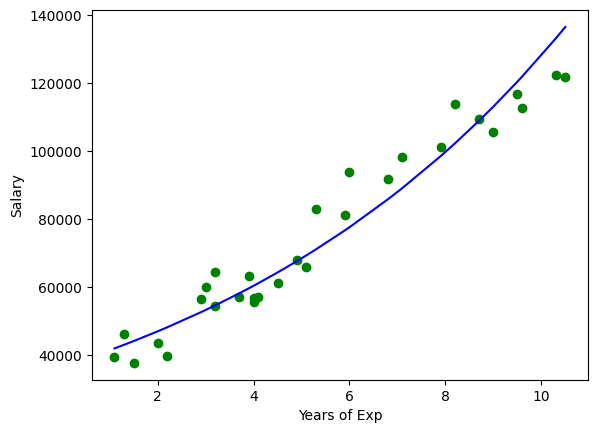

In [76]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'],color='green')
plt.plot(df['YearsExperience'],pred2,color='blue')
plt.xlabel('Years of Exp')
plt.ylabel('Salary')

***MODEL 3***

In [77]:
df['Years2'] = df['YearsExperience']*df['YearsExperience']
df

YearsExperience    Salary  Years2
0               1.1   39343.0    1.21
1               1.3   46205.0    1.69
2               1.5   37731.0    2.25
3               2.0   43525.0    4.00
4               2.2   39891.0    4.84
5               2.9   56642.0    8.41
6               3.0   60150.0    9.00
7               3.2   54445.0   10.24
8               3.2   64445.0   10.24
9               3.7   57189.0   13.69
10              3.9   63218.0   15.21
11              4.0   55794.0   16.00
12              4.0   56957.0   16.00
13              4.1   57081.0   16.81
14              4.5   61111.0   20.25
15              4.9   67938.0   24.01
16              5.1   66029.0   26.01
17              5.3   83088.0   28.09
18              5.9   81363.0   34.81
19              6.0   93940.0   36.00
20              6.8   91738.0   46.24
21              7.1   98273.0   50.41
22              7.9  101302.0   62.41
23              8.2  113812.0   67.24
24              8.7  109431.0   75.69
25              9.0  105582.0   81.00
26              9.5  116969.0   90.25
27              9.6  112635.0   92.16
28             10.3  122391.0  106.09
29             10.5  121872.0  110.25

In [79]:
model3 = smf.ols('np.log(Salary)~ YearsExperience+Years2', data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           3.95e-18
Time:                        09:30:55   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience     0.2024      0.027      7.601      0.000       0.148       0.257
Years2             -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
pred3_quad = model3.predict(pd.DataFrame(df))
pred3 = np.exp(pred3_quad)
pred3

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

In [85]:
rmse3 = np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred3))**2))
rmse3

5391.081582693588

In [87]:
pred3.corr(df['Salary'])

0.9798301486401542

Text(0, 0.5, 'Salary')

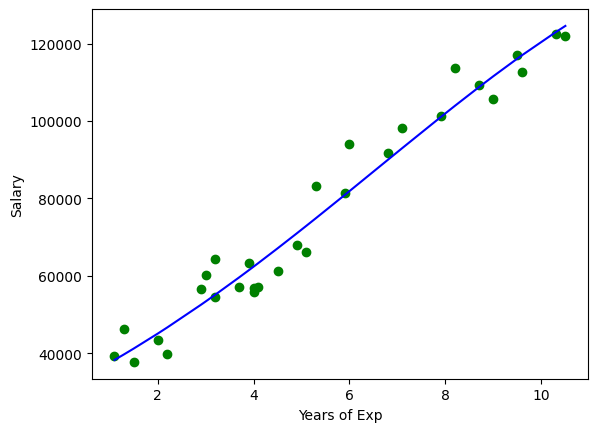

In [88]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'],color='green')
plt.plot(df['YearsExperience'],pred3,color='blue')
plt.xlabel('Years of Exp')
plt.ylabel('Salary')

In [91]:
data = {"MODEL":pd.Series(['model','model1','model2','model3']),
        "RMSE":pd.Series([rmse,rmse1,rmse2,rmse3]),
        "Rsquared":pd.Series([model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared])}
table=pd.DataFrame(data)
table

MODEL          RMSE  Rsquared
0   model   5592.043609  0.956957
1  model1  10302.893706  0.853889
2  model2   7213.235077  0.931967
3  model3   5391.081583  0.948611

Choosing the 3rd model due to lesser RMSE value and better Rsquared values.